In [8]:
# Insurance Data Exploratory Data Analysis (EDA)
# Project: Understanding Risk and Profitability Patterns

## 1. Setup and Data Loading

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:
# Load the dataset
# Replace 'your_data_file.csv' with the actual path to your data
try:
    df = pd.read_csv(r'C:\Users\Antifragile\Desktop\Insurance_risk_analysis_and_predictive_modeling\notebooks\cleaned_policies.csv')
    print(f"Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Please ensure your data file is in the correct path")
    # For demonstration, we'll create sample data structure
    print("Creating sample data structure for demonstration...")

Data loaded successfully!
Dataset shape: (618174, 56)


In [11]:
## 2. Data Understanding

### 2.1 Initial Data Exploration

# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n=== COLUMN INFORMATION ===")
print(df.info())

=== DATASET OVERVIEW ===
Shape: (618174, 56)
Memory usage: 1477.28 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618174 entries, 0 to 618173
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       618174 non-null  int64  
 1   PolicyID                  618174 non-null  int64  
 2   TransactionMonth          618174 non-null  object 
 3   IsVATRegistered           618174 non-null  bool   
 4   Citizenship               618174 non-null  object 
 5   LegalType                 618174 non-null  object 
 6   Title                     618174 non-null  object 
 7   Language                  618174 non-null  object 
 8   Bank                      535638 non-null  object 
 9   AccountType               587440 non-null  object 
 10  MaritalStatus             613103 non-null  object 
 11  Gender                    613553 non-null  object 
 12  Co

In [14]:
# Convert TransactionMonth to datetime 
if 'TransactionMonth' in df.columns:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    print("TransactionMonth converted to datetime")

TransactionMonth converted to datetime


In [15]:
# Create additional time-based features
if 'TransactionMonth' in df.columns:
    df['Year'] = df['TransactionMonth'].dt.year
    df['Month'] = df['TransactionMonth'].dt.month
    df['Quarter'] = df['TransactionMonth'].dt.quarter
    print("Time-based features created")

Time-based features created


In [16]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nDuplicates:", duplicates)


Duplicates: 0


In [17]:
# Validate categorical consistency (e.g., unique values in Province)
print("\nUnique Provinces:", df["Province"].unique())
print("Unique VehicleTypes:", df["VehicleType"].unique())


Unique Provinces: ['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']
Unique VehicleTypes: ['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]


In [ ]:
# Financial Variables Summary

# Focus on key financial variables
financial_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 
                 'CalculatedPremiumPerTerm', 'CustomValueEstimate']
available_financial_cols = [col for col in financial_cols if col in df.columns]

if available_financial_cols:
    print("\n=== FINANCIAL VARIABLES SUMMARY (IN SOUTH AFRICAN RAND - ZAR) ===")
    
    # Configure pandas to show full numbers and Rand currency
    pd.set_option('display.float_format', lambda x: 'R{:,.2f}'.format(x))
    
    # Generate summary statistics
    financial_summary = df[available_financial_cols].describe()
    
    # Add insurance-specific metrics
    financial_summary.loc['nonzero_count'] = df[available_financial_cols].astype(bool).sum()
    financial_summary.loc['loss_ratio'] = df['TotalClaims'].sum() / df['TotalPremium'].sum()
    
    # Display the enhanced summary
    display(financial_summary)
    
    # Reset formatting
    pd.reset_option('display.float_format')
    
    # Print key insights
    print("\n=== KEY INSIGHTS ===")
    print(f"1. Overall Loss Ratio: {financial_summary.loc['loss_ratio'].values[0]:.1%}")
    print(f"2. {financial_summary.loc['nonzero_count']['TotalClaims']:,} policies had claims")
    print(f"3. Maximum Claim Amount: R{financial_summary['TotalClaims']['max']:,.2f}")
    print(f"4. {financial_summary.loc['count']['CustomValueEstimate']/len(df):.1%} of policies have custom values")
    
else:
    print("Warning: Financial columns not found with expected names")
    print("Available columns:", [col for col in df.columns if 'premium' in col.lower() or 'claim' in col.lower()])


=== FINANCIAL VARIABLES SUMMARY (IN SOUTH AFRICAN RAND - ZAR) ===


,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm,CustomValueEstimate
count,"R618,174.00","R618,174.00","R618,174.00","R618,174.00","R156,100.00"
mean,R100.20,R100.44,"R609,828.05",R118.53,"R231,256.33"
std,R286.24,"R2,989.94","R1,515,213.38",R344.71,"R667,401.64"
min,R0.00,R0.00,R0.01,R0.00,"R20,000.00"
25%,R2.63,R0.00,"R5,000.00",R3.26,"R135,600.00"
50%,R7.28,R0.00,"R7,500.00",R8.44,"R220,000.00"
75%,R78.95,R0.00,"R250,500.00",R90.00,"R280,000.00"
max,"R65,282.60","R393,092.11","R12,636,200.00","R74,422.17","R26,550,000.00"
nonzero_count,"R618,174.00","R2,641.00","R618,174.00","R618,174.00","R618,174.00"
loss_ratio,R1.00,R1.00,R1.00,R1.00,R1.00



=== KEY INSIGHTS ===
1. Overall Loss Ratio: 100.2%
2. 2,641.0 policies had claims
3. Maximum Claim Amount: R393,092.11
4. 25.3% of policies have custom values


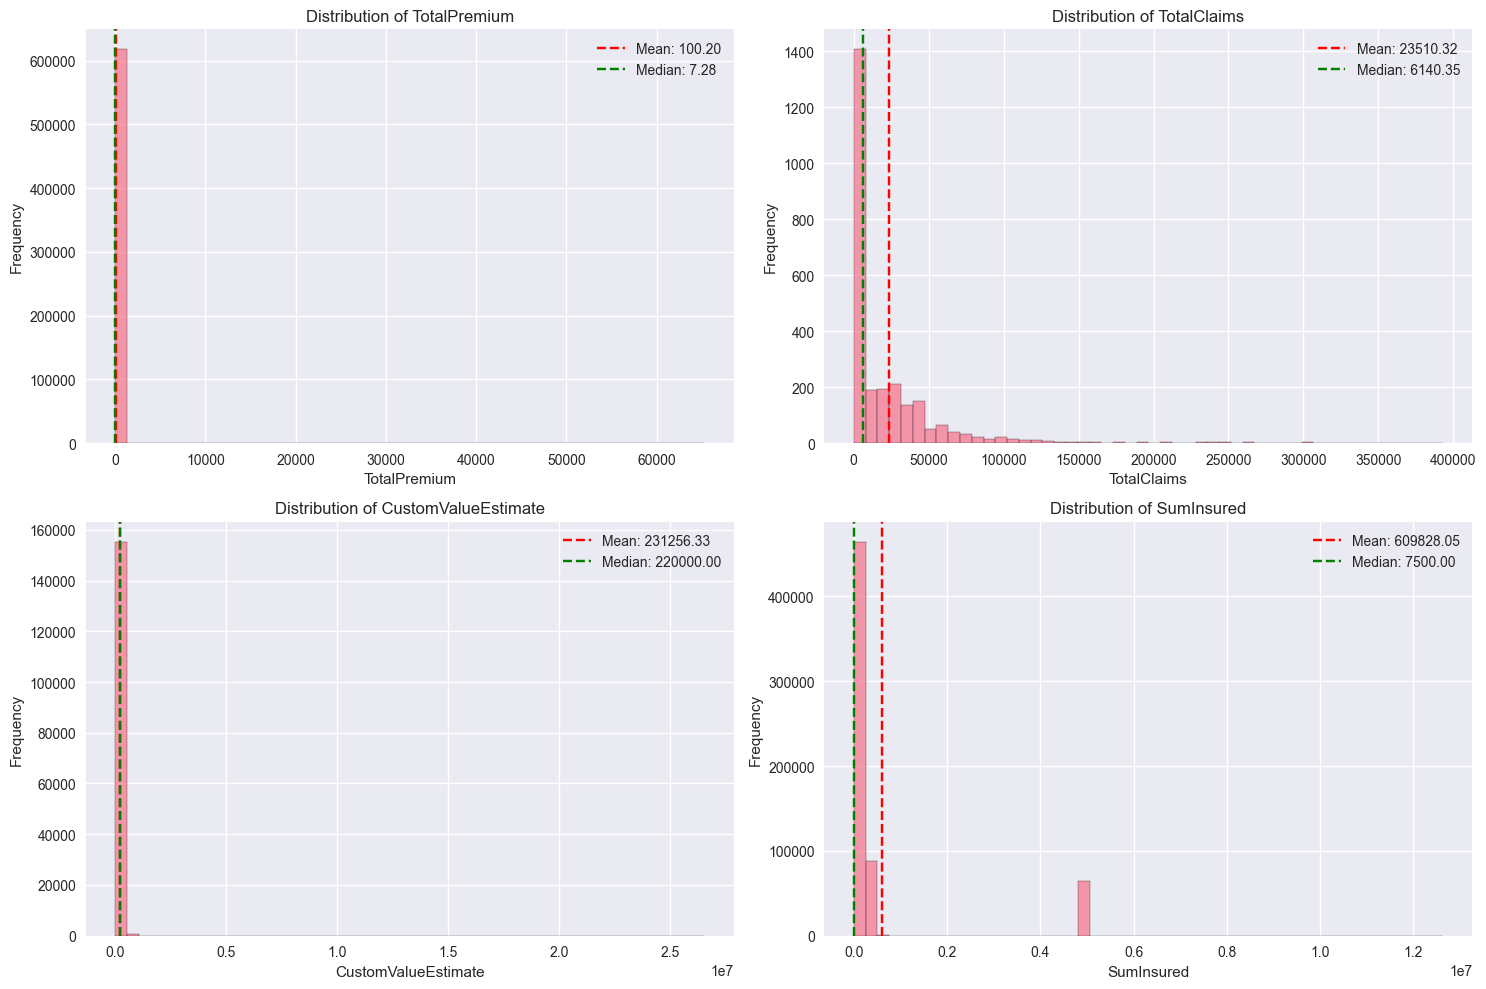

In [ ]:
##  Univariate Analysis

###  Numerical Variables Distribution

# Analyze distributions of key numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
key_numerical = [col for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured'] 
                if col in numerical_cols]

if key_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(key_numerical[:4]):
        if i < len(axes):
            # Remove zeros for better visualization
            data_non_zero = df[df[col] > 0][col]
            
            axes[i].hist(data_non_zero, bins=50, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            
            # Add statistics text
            mean_val = data_non_zero.mean()
            median_val = data_non_zero.median()
            axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
            axes[i].legend()
    
    plt.tight_layout()
    plt.show()

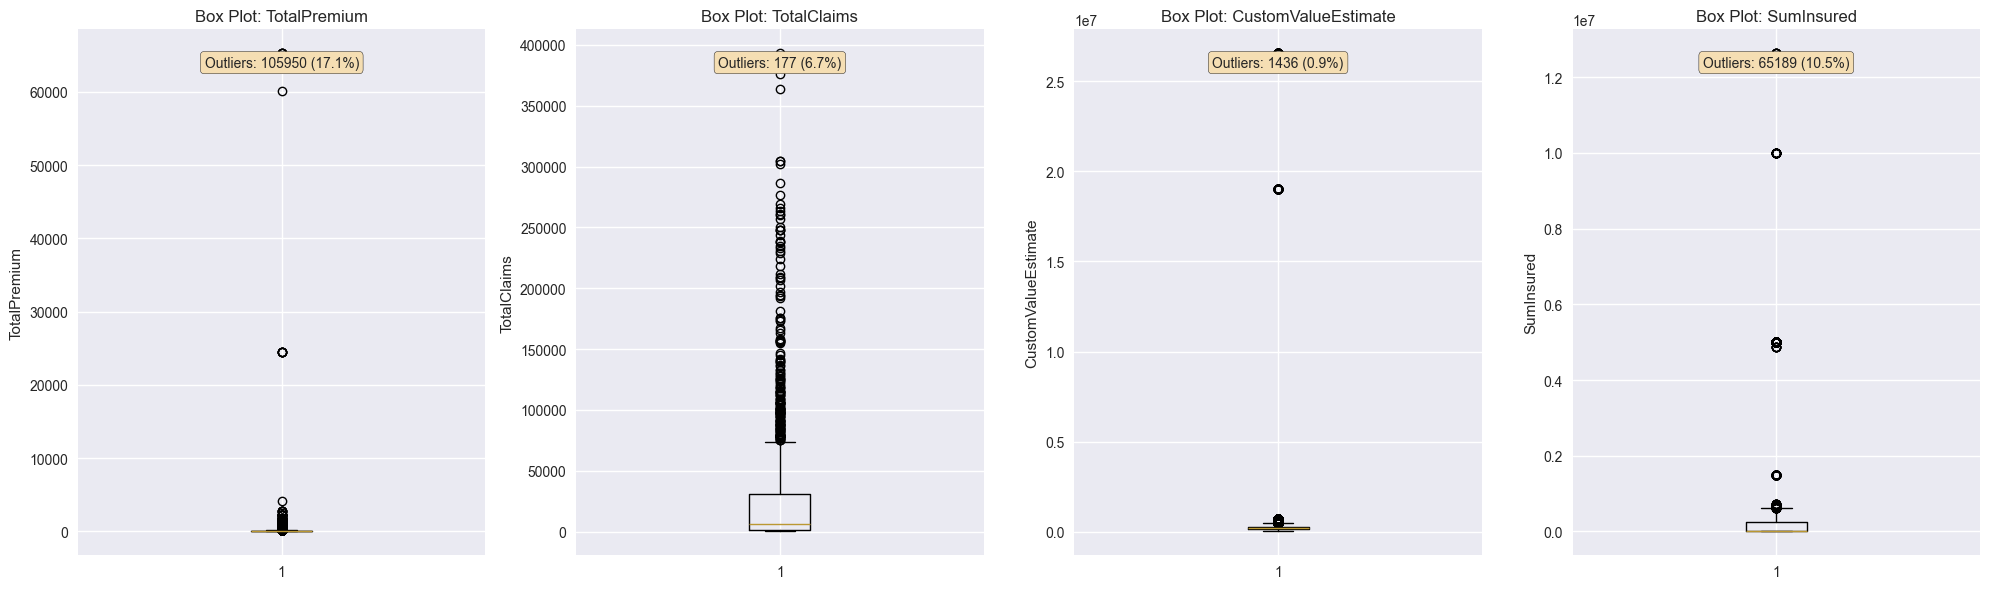

In [24]:
# Box plots for outlier detection
if key_numerical:
    fig, axes = plt.subplots(1, len(key_numerical), figsize=(20, 6))
    if len(key_numerical) == 1:
        axes = [axes]
    
    for i, col in enumerate(key_numerical):
        # Remove zeros for better visualization
        data_non_zero = df[df[col] > 0][col]
        
        axes[i].boxplot(data_non_zero)
        axes[i].set_title(f'Box Plot: {col}')
        axes[i].set_ylabel(col)
        
        # Calculate and display outlier statistics
        Q1 = data_non_zero.quantile(0.25)
        Q3 = data_non_zero.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data_non_zero[(data_non_zero < Q1 - 1.5*IQR) | (data_non_zero > Q3 + 1.5*IQR)]
        
        axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(data_non_zero)*100:.1f}%)', 
                    transform=axes[i].transAxes, ha='center', va='top', 
                    bbox=dict(boxstyle='round', facecolor='wheat'))
    
    plt.tight_layout()
    plt.show()

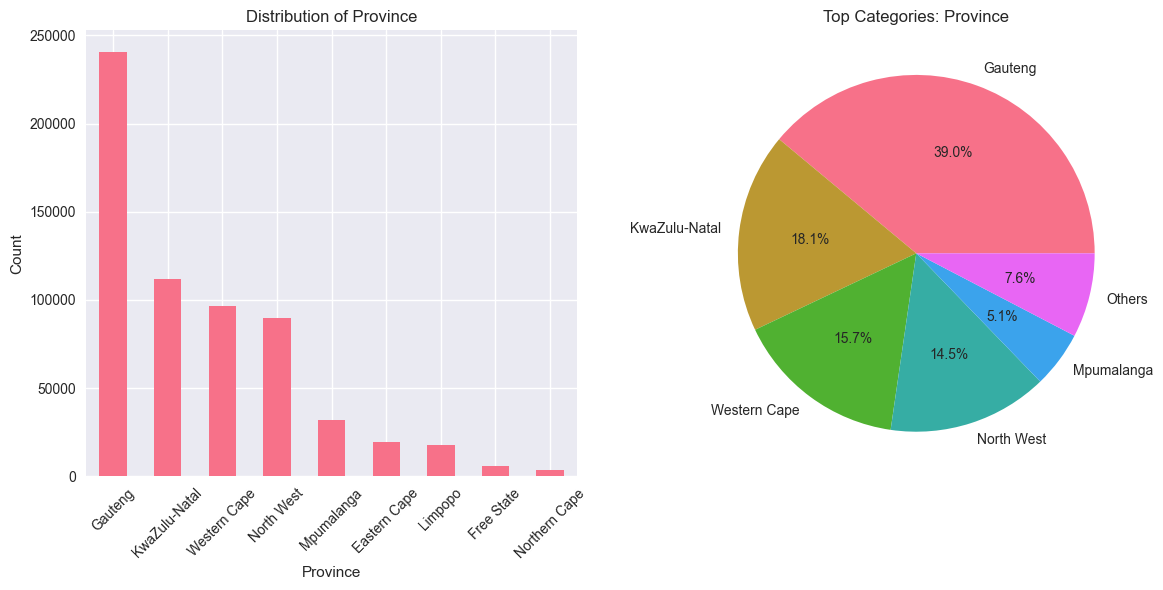


Province - Top 10 values:
Province
Gauteng          240781
KwaZulu-Natal    111896
Western Cape      96757
North West        89799
Mpumalanga        31663
Eastern Cape      19694
Limpopo           18009
Free State         5932
Northern Cape      3643
--------------------------------------------------


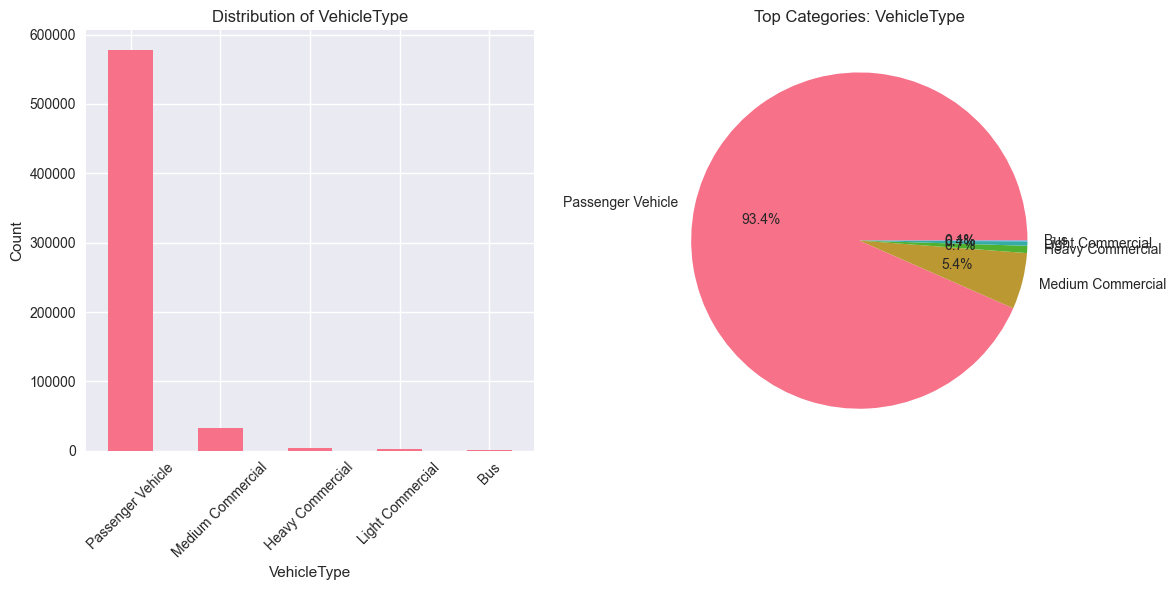


VehicleType - Top 10 values:
VehicleType
Passenger Vehicle    577200
Medium Commercial     33428
Heavy Commercial       4264
Light Commercial       2614
Bus                     450
--------------------------------------------------


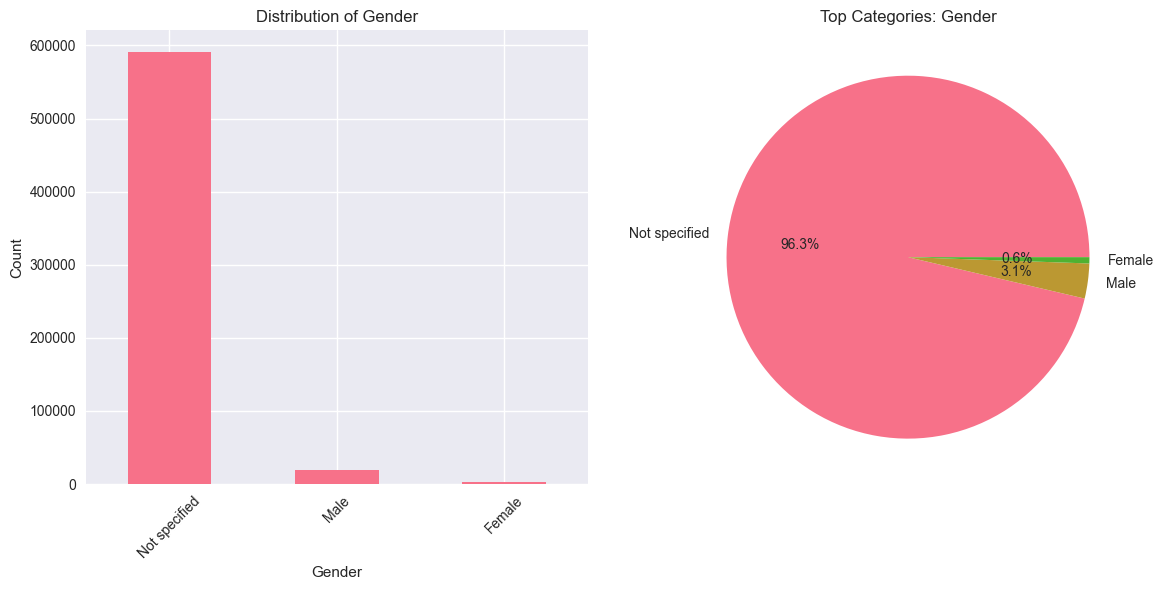


Gender - Top 10 values:
Gender
Not specified    591066
Male              19083
Female             3404
--------------------------------------------------


In [ ]:
 #Categorical Variables Analysis

# Analyze key categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
key_categorical = [col for col in ['Province', 'VehicleType', 'Gender', 'Make'] 
                  if col in categorical_cols]

for col in key_categorical[:4]:  # Limit to first 4 for space
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        
        # Count plot
        value_counts = df[col].value_counts().head(10)  # Top 10 categories
        
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Pie chart for top categories
        plt.subplot(1, 2, 2)
        top_5 = value_counts.head(5)
        others = value_counts.iloc[5:].sum()
        if others > 0:
            pie_data = top_5.tolist() + [others]
            pie_labels = top_5.index.tolist() + ['Others']
        else:
            pie_data = top_5.values
            pie_labels = top_5.index
            
        plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
        plt.title(f'Top Categories: {col}')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n{col} - Top 10 values:")
        print(value_counts.to_string())
        print("-" * 50)

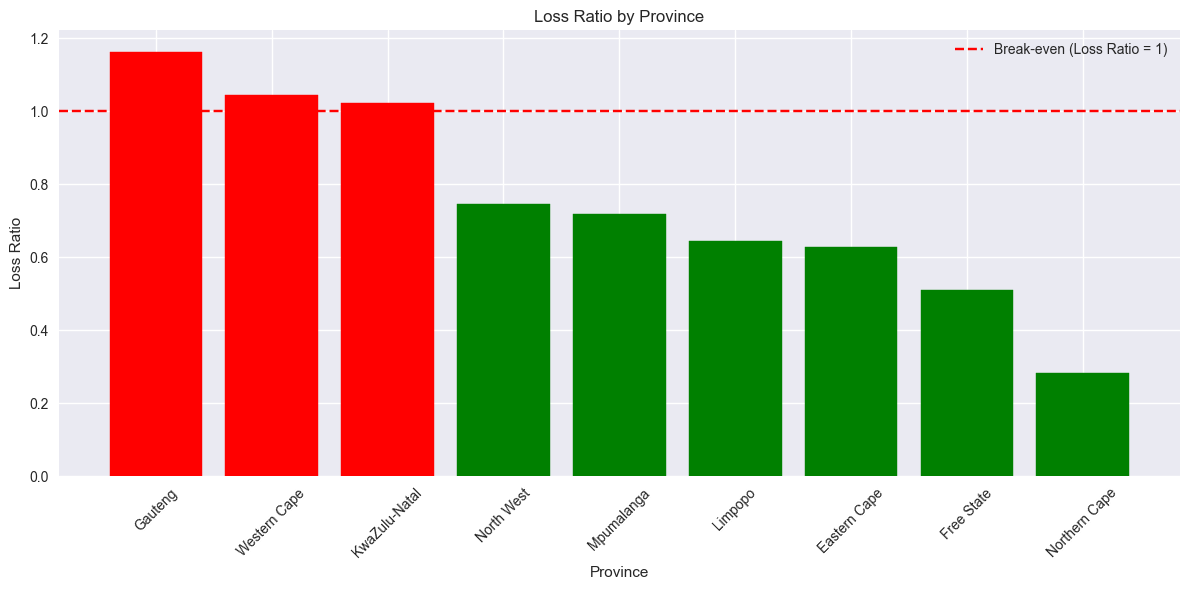

=== LOSS RATIO BY PROVINCE ===
     Province  TotalPremium  TotalClaims  PolicyID  LossRatio
      Gauteng  2.405423e+07 2.799328e+07    240781   1.163757
 Western Cape  9.809536e+06 1.024795e+07     96757   1.044693
KwaZulu-Natal  1.323578e+07 1.352635e+07    111896   1.021953
   North West  7.490508e+06 5.593723e+06     89799   0.746775
   Mpumalanga  2.836292e+06 2.035792e+06     31663   0.717765
      Limpopo  1.537324e+06 9.918930e+05     18009   0.645207
 Eastern Cape  2.140303e+06 1.346308e+06     19694   0.629027
   Free State  5.213632e+05 2.659749e+05      5932   0.510153
Northern Cape  3.165581e+05 8.949051e+04      3643   0.282699


In [26]:
##  Bivariate Analysis

###  Loss Ratio by Key Dimensions

# Loss Ratio by Province
if 'LossRatio' in df.columns and 'Province' in df.columns:
    province_analysis = df.groupby('Province').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    province_analysis['LossRatio'] = province_analysis['TotalClaims'] / province_analysis['TotalPremium']
    province_analysis = province_analysis.sort_values('LossRatio', ascending=False)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(province_analysis)), province_analysis['LossRatio'])
    plt.xlabel('Province')
    plt.ylabel('Loss Ratio')
    plt.title('Loss Ratio by Province')
    plt.xticks(range(len(province_analysis)), province_analysis['Province'], rotation=45)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even (Loss Ratio = 1)')
    plt.legend()
    
    # Color bars based on profitability
    for i, bar in enumerate(bars):
        if province_analysis.iloc[i]['LossRatio'] > 1:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    plt.tight_layout()
    plt.show()
    
    print("=== LOSS RATIO BY PROVINCE ===")
    print(province_analysis.to_string(index=False))

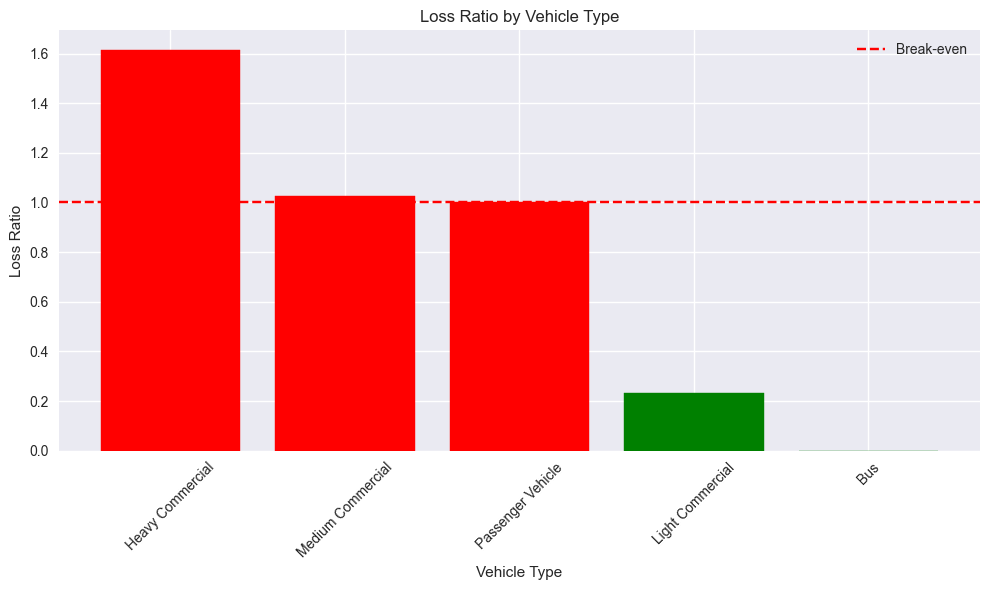

=== LOSS RATIO BY VEHICLE TYPE ===
      VehicleType  TotalPremium  TotalClaims  PolicyID  LossRatio
 Heavy Commercial  4.609479e+05 7.432425e+05      4264   1.612422
Medium Commercial  3.922840e+06 4.032212e+06     33428   1.027881
Passenger Vehicle  5.667219e+07 5.669817e+07    577200   1.000458
 Light Commercial  2.604975e+05 6.045250e+04      2614   0.232066
              Bus  5.824474e+04 0.000000e+00       450   0.000000


In [27]:
# Loss Ratio by Vehicle Type
if 'LossRatio' in df.columns and 'VehicleType' in df.columns:
    vehicle_analysis = df.groupby('VehicleType').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    vehicle_analysis['LossRatio'] = vehicle_analysis['TotalClaims'] / vehicle_analysis['TotalPremium']
    vehicle_analysis = vehicle_analysis.sort_values('LossRatio', ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(vehicle_analysis['VehicleType'], vehicle_analysis['LossRatio'])
    plt.xlabel('Vehicle Type')
    plt.ylabel('Loss Ratio')
    plt.title('Loss Ratio by Vehicle Type')
    plt.xticks(rotation=45)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even')
    plt.legend()
    
    # Color coding
    for i, bar in enumerate(bars):
        if vehicle_analysis.iloc[i]['LossRatio'] > 1:
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    plt.tight_layout()
    plt.show()
    
    print("=== LOSS RATIO BY VEHICLE TYPE ===")
    print(vehicle_analysis.to_string(index=False))

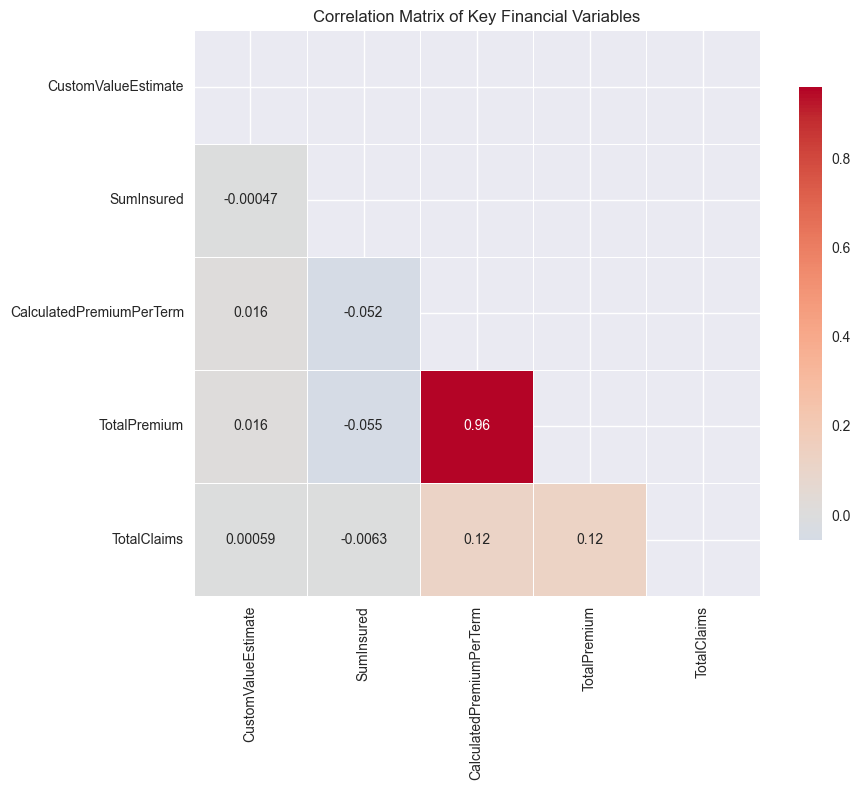

=== CORRELATION INSIGHTS ===
CalculatedPremiumPerTerm ↔ TotalPremium: 0.959


In [28]:
### 5Correlation Analysis

# Correlation matrix for numerical variables
if len(numerical_cols) > 1:
    # Select key numerical columns for correlation
    correlation_cols = [col for col in numerical_cols 
                       if col in ['TotalPremium', 'TotalClaims', 'SumInsured', 
                                'CustomValueEstimate', 'CalculatedPremiumPerTerm']]
    
    if len(correlation_cols) > 1:
        corr_matrix = df[correlation_cols].corr()
        
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix of Key Financial Variables')
        plt.tight_layout()
        plt.show()
        
        print("=== CORRELATION INSIGHTS ===")
        # Find high correlations
        high_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.5:  # Threshold for high correlation
                    high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
        
        if high_corr:
            for var1, var2, corr_val in high_corr:
                print(f"{var1} ↔ {var2}: {corr_val:.3f}")
        else:
            print("No high correlations (>0.5) found among financial variables")


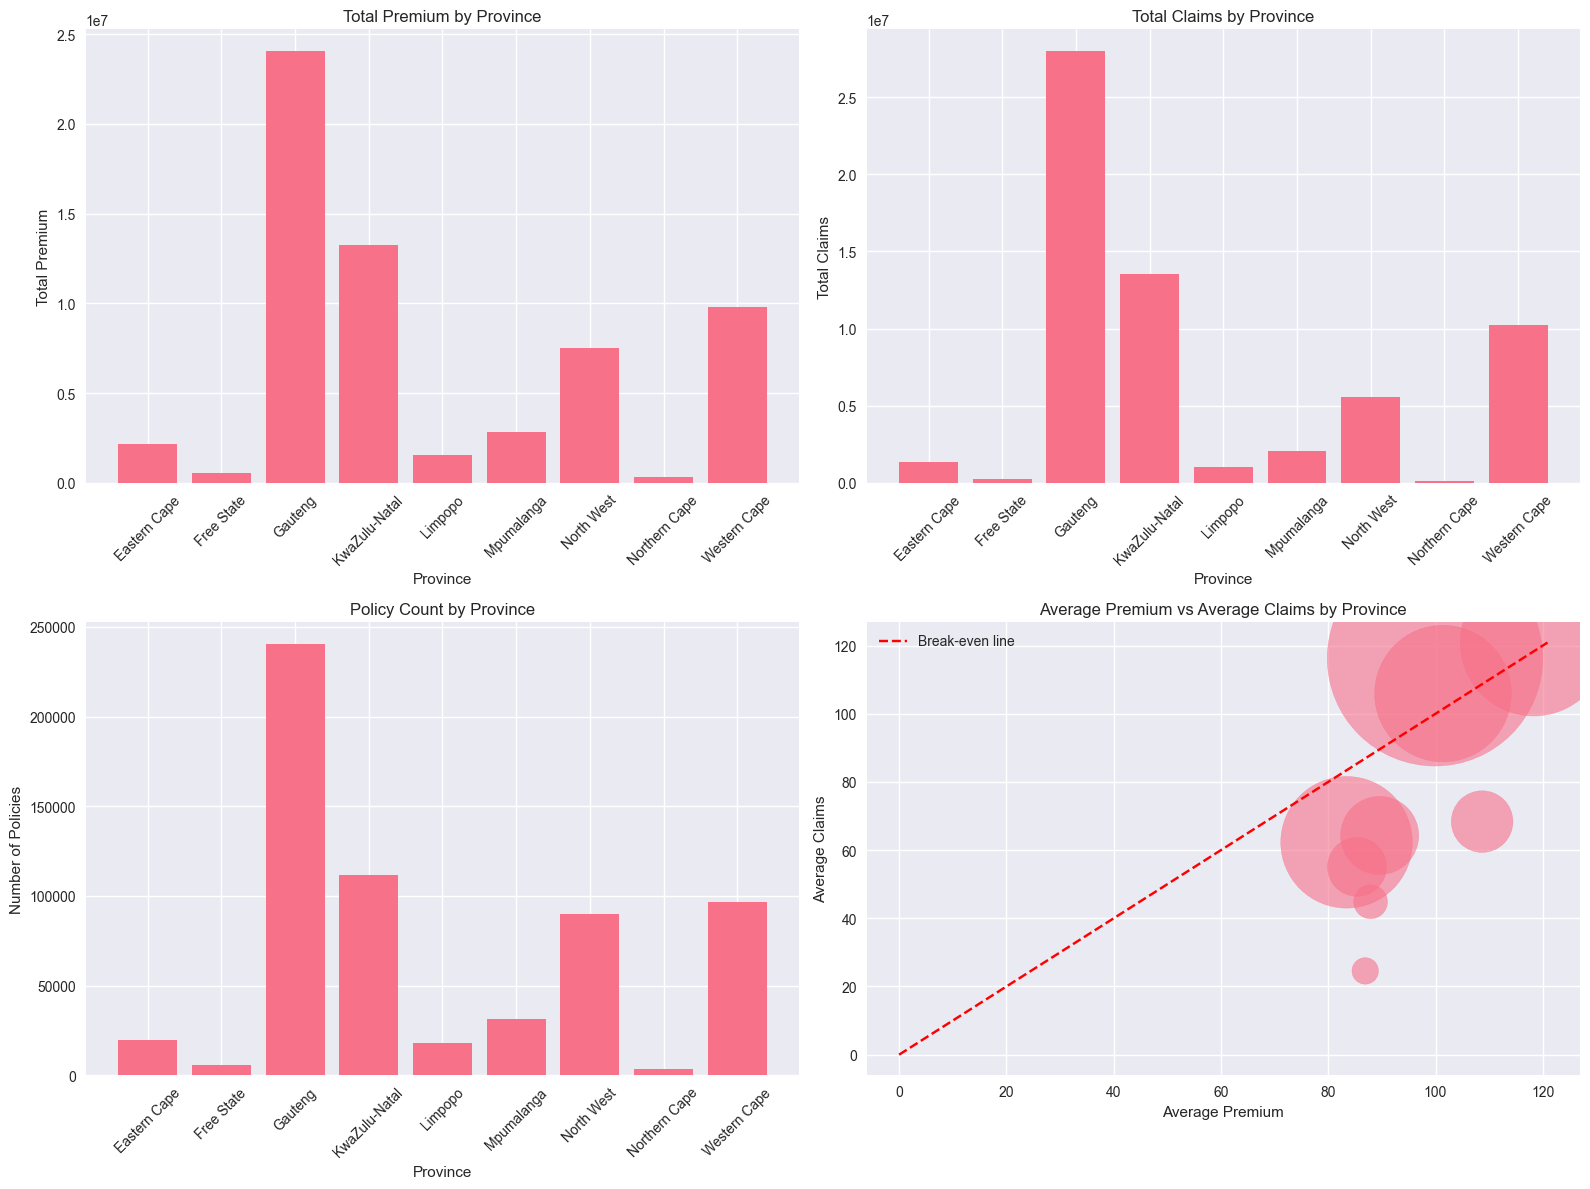

=== GEOGRAPHIC ANALYSIS SUMMARY ===
     Province  Premium_Total  Premium_Avg  Policy_Count  Claims_Total  Claims_Avg  LossRatio
      Gauteng    24054229.89        99.90        240781   27993277.17      116.26   1.163757
 Western Cape     9809536.36       101.38         96757   10247953.51      105.91   1.044693
KwaZulu-Natal    13235782.89       118.29        111896   13526351.81      120.88   1.021953
   North West     7490508.18        83.41         89799    5593722.65       62.29   0.746775
   Mpumalanga     2836291.94        89.58         31663    2035792.49       64.30   0.717765
      Limpopo     1537324.50        85.36         18009     991892.97       55.08   0.645207
 Eastern Cape     2140302.66       108.68         19694    1346307.75       68.36   0.629027
   Free State      521363.24        87.89          5932     265974.90       44.84   0.510153
Northern Cape      316558.07        86.89          3643      89490.51       24.57   0.282699


In [29]:
### Geographic Analysis
# Premium and Claims by Geographic Region
if all(col in df.columns for col in ['Province', 'TotalPremium', 'TotalClaims']):
    geo_analysis = df.groupby('Province').agg({
        'TotalPremium': ['sum', 'mean', 'count'],
        'TotalClaims': ['sum', 'mean']
    }).round(2)
    
    # Flatten column names
    geo_analysis.columns = ['Premium_Total', 'Premium_Avg', 'Policy_Count', 'Claims_Total', 'Claims_Avg']
    geo_analysis = geo_analysis.reset_index()
    geo_analysis['LossRatio'] = geo_analysis['Claims_Total'] / geo_analysis['Premium_Total']
    
    # Create subplots for geographic analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Total Premium by Province
    axes[0,0].bar(geo_analysis['Province'], geo_analysis['Premium_Total'])
    axes[0,0].set_title('Total Premium by Province')
    axes[0,0].set_xlabel('Province')
    axes[0,0].set_ylabel('Total Premium')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Total Claims by Province  
    axes[0,1].bar(geo_analysis['Province'], geo_analysis['Claims_Total'])
    axes[0,1].set_title('Total Claims by Province')
    axes[0,1].set_xlabel('Province')
    axes[0,1].set_ylabel('Total Claims')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Policy Count by Province
    axes[1,0].bar(geo_analysis['Province'], geo_analysis['Policy_Count'])
    axes[1,0].set_title('Policy Count by Province')
    axes[1,0].set_xlabel('Province')
    axes[1,0].set_ylabel('Number of Policies')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Average Premium vs Average Claims
    axes[1,1].scatter(geo_analysis['Premium_Avg'], geo_analysis['Claims_Avg'], 
                     s=geo_analysis['Policy_Count']/10, alpha=0.6)
    axes[1,1].set_title('Average Premium vs Average Claims by Province')
    axes[1,1].set_xlabel('Average Premium')
    axes[1,1].set_ylabel('Average Claims')
    
    # Add diagonal line for break-even
    max_val = max(geo_analysis['Premium_Avg'].max(), geo_analysis['Claims_Avg'].max())
    axes[1,1].plot([0, max_val], [0, max_val], 'r--', label='Break-even line')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("=== GEOGRAPHIC ANALYSIS SUMMARY ===")
    print(geo_analysis.sort_values('LossRatio', ascending=False).to_string(index=False))


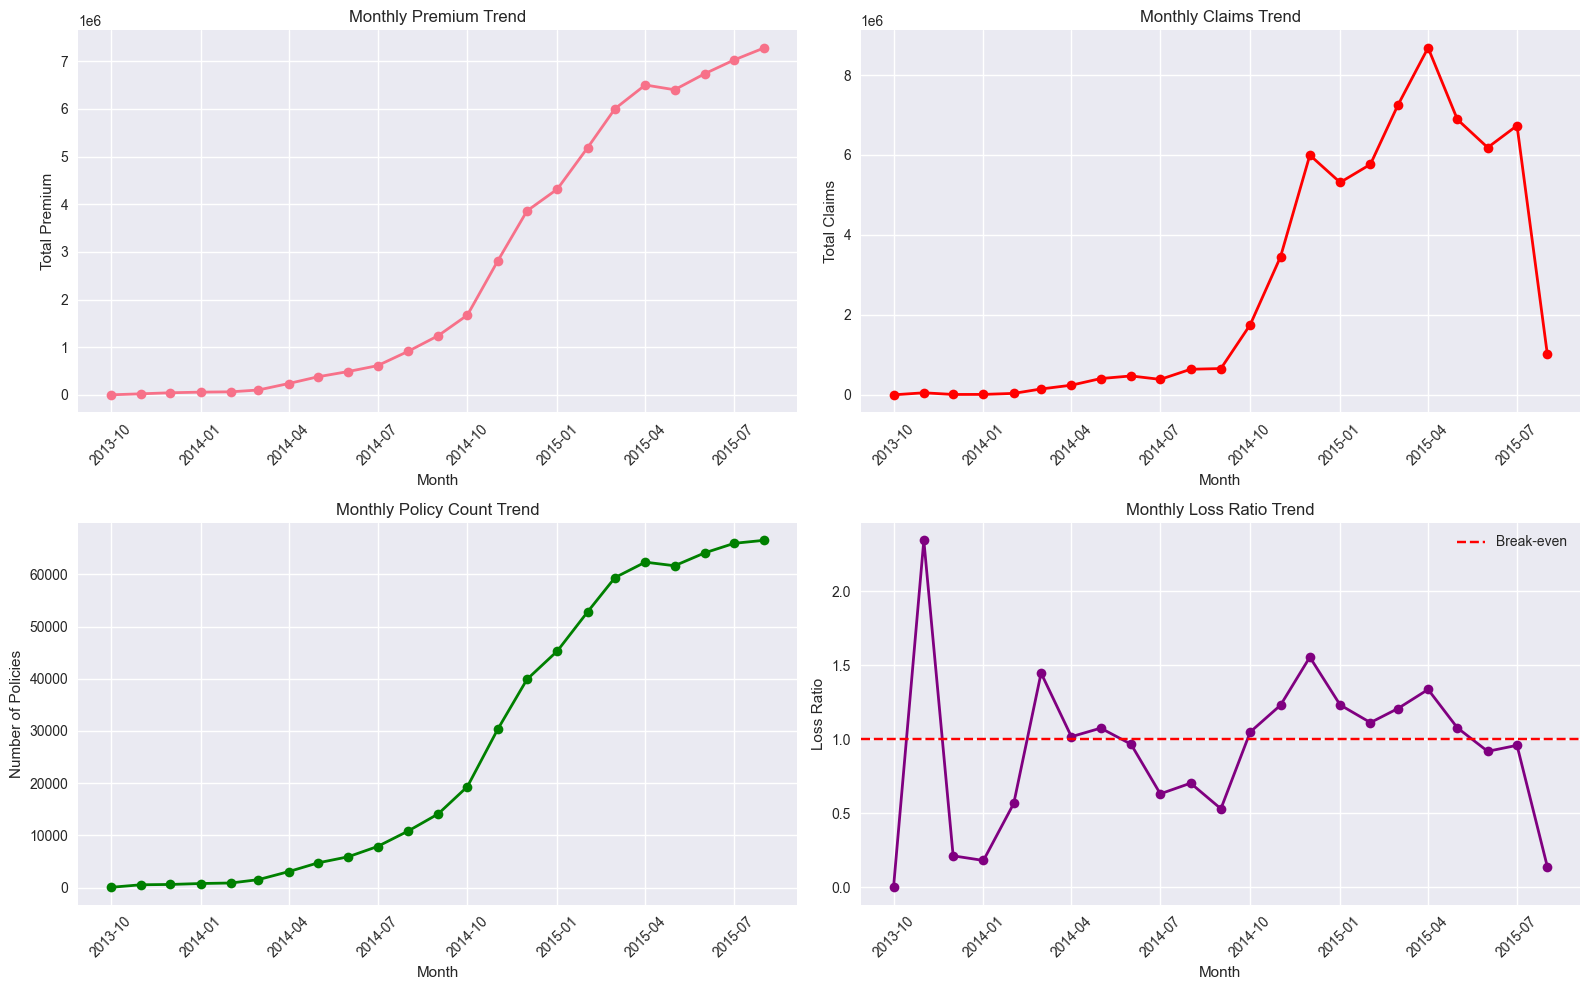

=== TEMPORAL TRENDS SUMMARY ===
TransactionMonth  TotalPremium  TotalClaims  PolicyID  LossRatio
      2013-10-01  3.710635e+02 0.000000e+00        36   0.000000
      2013-11-01  2.159196e+04 5.058508e+04       524   2.342773
      2013-12-01  4.366881e+04 9.283386e+03       585   0.212586
      2014-01-01  5.669357e+04 1.028016e+04       764   0.181328
      2014-02-01  6.339680e+04 3.588042e+04       865   0.565966
      2014-03-01  1.011856e+05 1.463812e+05      1504   1.446661
      2014-04-01  2.368827e+05 2.408658e+05      3039   1.016814
      2014-05-01  3.785201e+05 4.067548e+05      4715   1.074592
      2014-06-01  4.888278e+05 4.722523e+05      5885   0.966091
      2014-07-01  6.118770e+05 3.861800e+05      7854   0.631140
      2014-08-01  9.094301e+05 6.393569e+05     10784   0.703030
      2014-09-01  1.239678e+06 6.574307e+05     14085   0.530324
      2014-10-01  1.672963e+06 1.754201e+06     19330   1.048559
      2014-11-01  2.807847e+06 3.452344e+06     30305   1.

In [30]:
### 6.1 Trends Over Time

# Monthly trends analysis
if 'TransactionMonth' in df.columns:
    monthly_trends = df.groupby('TransactionMonth').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    monthly_trends['LossRatio'] = monthly_trends['TotalClaims'] / monthly_trends['TotalPremium']
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Premium trend
    axes[0,0].plot(monthly_trends['TransactionMonth'], monthly_trends['TotalPremium'], 
                   marker='o', linewidth=2)
    axes[0,0].set_title('Monthly Premium Trend')
    axes[0,0].set_xlabel('Month')
    axes[0,0].set_ylabel('Total Premium')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Claims trend
    axes[0,1].plot(monthly_trends['TransactionMonth'], monthly_trends['TotalClaims'], 
                   marker='o', linewidth=2, color='red')
    axes[0,1].set_title('Monthly Claims Trend')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Total Claims')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Policy count trend
    axes[1,0].plot(monthly_trends['TransactionMonth'], monthly_trends['PolicyID'], 
                   marker='o', linewidth=2, color='green')
    axes[1,0].set_title('Monthly Policy Count Trend')
    axes[1,0].set_xlabel('Month')
    axes[1,0].set_ylabel('Number of Policies')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Loss ratio trend
    axes[1,1].plot(monthly_trends['TransactionMonth'], monthly_trends['LossRatio'], 
                   marker='o', linewidth=2, color='purple')
    axes[1,1].axhline(y=1, color='red', linestyle='--', label='Break-even')
    axes[1,1].set_title('Monthly Loss Ratio Trend')
    axes[1,1].set_xlabel('Month')
    axes[1,1].set_ylabel('Loss Ratio')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("=== TEMPORAL TRENDS SUMMARY ===")
    print(monthly_trends.to_string(index=False))

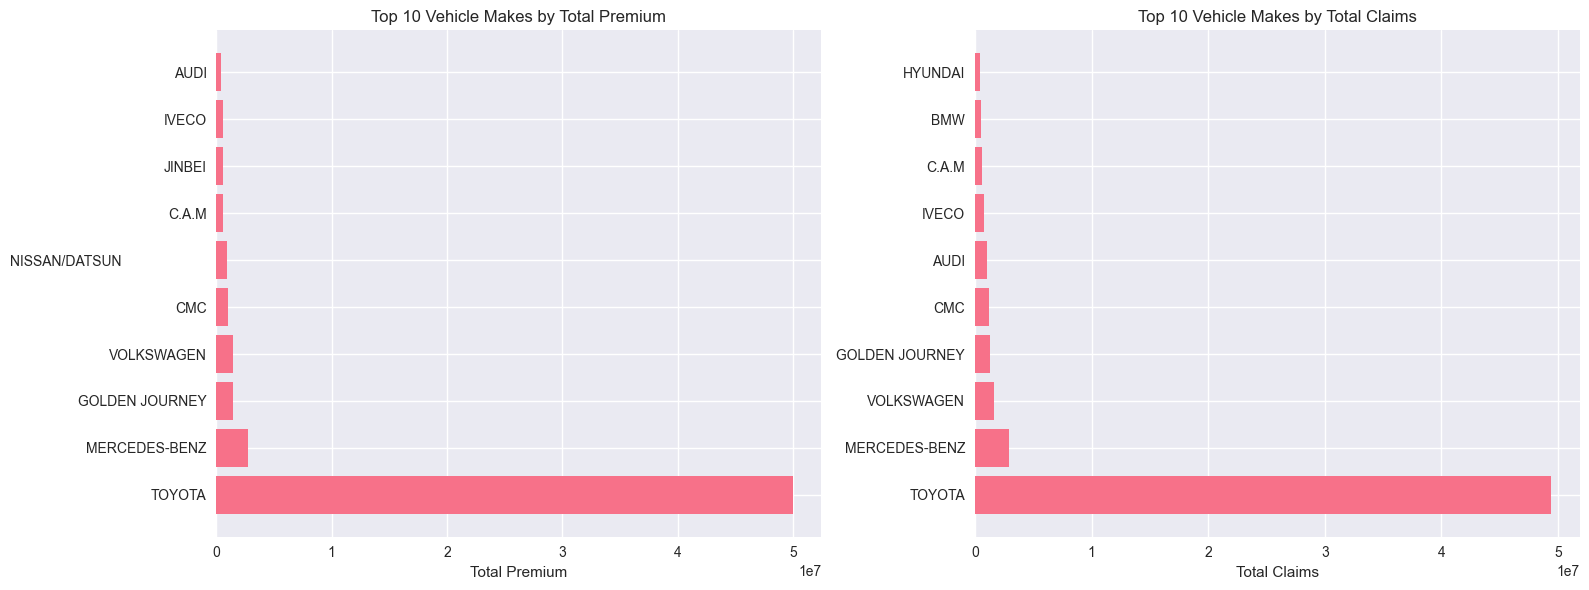

=== HIGHEST RISK VEHICLE MAKES (Loss Ratio) ===
(Minimum 10 policies)
                               make  TotalPremium  TotalClaims  PolicyID  LossRatio
SUZUKI                               2.701257e+04 1.689168e+05       243   6.253267
JMC                                  5.635786e+03 2.300218e+04        40   4.081449
                            HYUNDAI  1.136156e+05 4.533079e+05      1205   3.989840
                           POLARSUN  4.102940e+04 1.251978e+05       542   3.051418
                               AUDI  3.762743e+05 1.018710e+06      3735   2.707359
                                BMW  2.427652e+05 4.809722e+05      2453   1.981223
                              B.A.W  1.660440e+05 2.871375e+05      1393   1.729285
                              IVECO  5.261262e+05 7.486609e+05      4959   1.422968
                                CMC  9.691589e+05 1.224566e+06     11411   1.263535
                         VOLKSWAGEN  1.416985e+06 1.663697e+06     12890   1.174111

=== L

In [31]:
##  Vehicle Analysis

###  Make and Model Analysis

# Top vehicle makes by claims and premiums
if all(col in df.columns for col in ['make', 'TotalPremium', 'TotalClaims']):
    make_analysis = df.groupby('make').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    make_analysis['LossRatio'] = make_analysis['TotalClaims'] / make_analysis['TotalPremium']
    
    # Top 10 makes by premium volume
    top_makes_premium = make_analysis.nlargest(10, 'TotalPremium')
    
    # Top 10 makes by claims
    top_makes_claims = make_analysis.nlargest(10, 'TotalClaims')
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top makes by premium
    axes[0].barh(top_makes_premium['make'], top_makes_premium['TotalPremium'])
    axes[0].set_title('Top 10 Vehicle Makes by Total Premium')
    axes[0].set_xlabel('Total Premium')
    
    # Top makes by claims
    axes[1].barh(top_makes_claims['make'], top_makes_claims['TotalClaims'])
    axes[1].set_title('Top 10 Vehicle Makes by Total Claims')
    axes[1].set_xlabel('Total Claims')
    
    plt.tight_layout()
    plt.show()
    
    # Risk analysis by make
    risk_makes = make_analysis[make_analysis['PolicyID'] >= 10].sort_values('LossRatio', ascending=False)
    
    print("=== HIGHEST RISK VEHICLE MAKES (Loss Ratio) ===")
    print("(Minimum 10 policies)")
    print(risk_makes.head(10).to_string(index=False))
    
    print("\n=== LOWEST RISK VEHICLE MAKES (Loss Ratio) ===")
    print(risk_makes.tail(10).to_string(index=False))

In [37]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio', 'HasClaim', 'ClaimSeverity', 'Margin', 'Year', 'Month', 'Quarter']


In [46]:

# Group by 'make' and aggregate
make_analysis = df.groupby('make').agg(
    TotalPremium_sum=('TotalPremium', 'sum'),
    TotalClaims_sum=('TotalClaims', 'sum'),
    PolicyCount=('PolicyID', 'nunique')
).reset_index()

# Calculate LossRatio
make_analysis['LossRatio'] = make_analysis['TotalClaims_sum'] / make_analysis['TotalPremium_sum']

# Calculate ClaimFrequency: number of policies with claims / total unique policies
claims_per_make = df[df['TotalClaims'] > 0].groupby('make')['PolicyID'].nunique()
make_analysis['ClaimFrequency'] = make_analysis['make'].map(claims_per_make) / make_analysis['PolicyCount']

# Filter for makes with sufficient data (min 20 policies)
make_analysis = make_analysis[make_analysis['PolicyCount'] >= 20].sort_values('LossRatio', ascending=False)

print(make_analysis.head())

       make  TotalPremium_sum  TotalClaims_sum  PolicyCount  LossRatio  \
17  HYUNDAI     113615.556013     4.533079e+05           23   3.989840   
0      AUDI     376274.319824     1.018710e+06           40   2.707359   
2       BMW     242765.243528     4.809722e+05           32   1.981223   
1     B.A.W     166044.014668     2.871375e+05           20   1.729285   
18    IVECO     526126.238510     7.486609e+05           65   1.422968   

    ClaimFrequency  
17        0.173913  
0         0.450000  
2         0.343750  
1         0.200000  
18        0.230769  


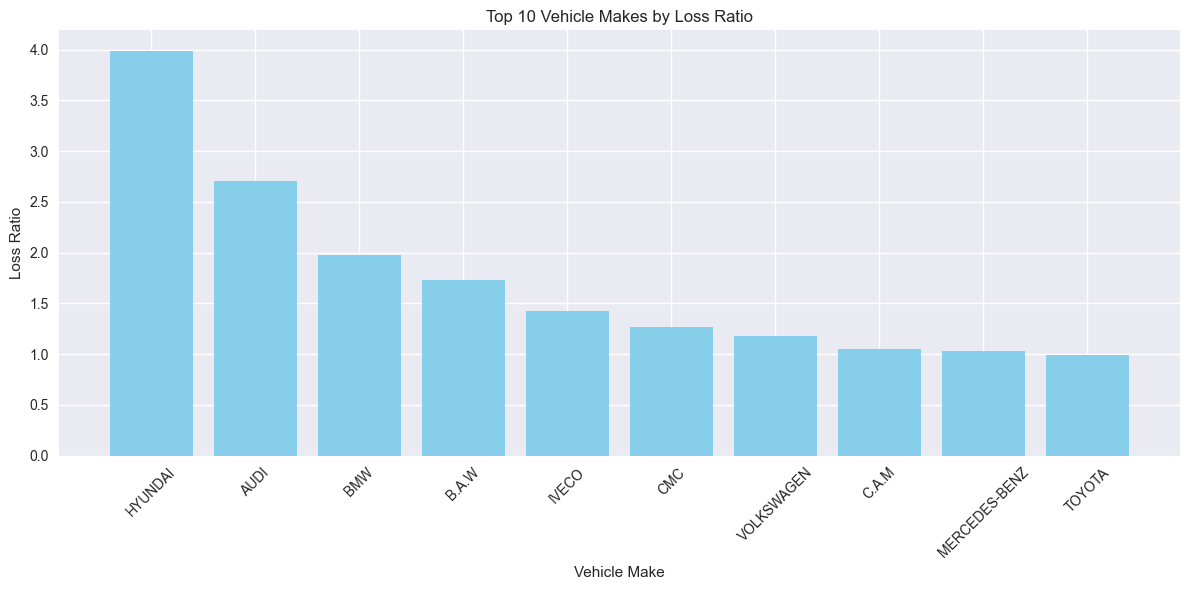

In [47]:

# Select top 10 makes by LossRatio for visualization
top_makes = make_analysis.sort_values('LossRatio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_makes['make'], top_makes['LossRatio'], color='skyblue')
plt.xlabel('Vehicle Make')
plt.ylabel('Loss Ratio')
plt.title('Top 10 Vehicle Makes by Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

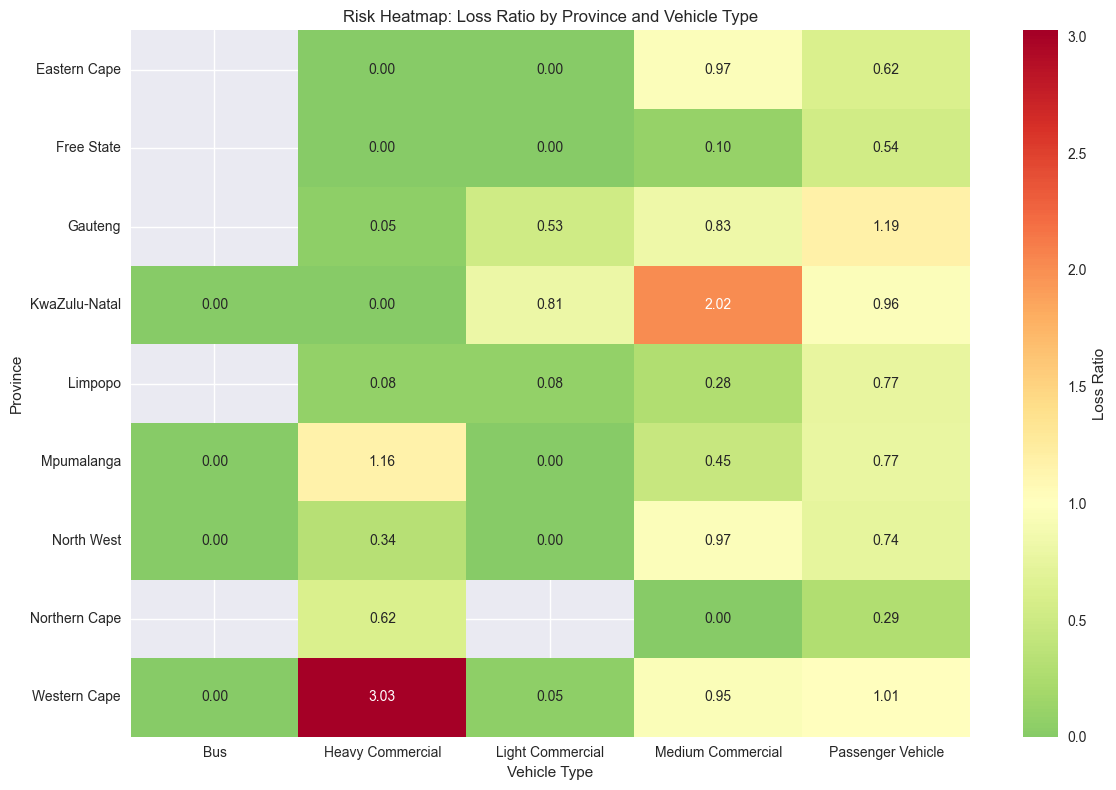

Red areas indicate loss ratios > 1 (unprofitable)


In [50]:
##  Creative Visualizations - Key Insights

###  Interactive Risk Heatmap

# Create a comprehensive risk heatmap
if all(col in df.columns for col in ['Province', 'VehicleType', 'TotalPremium', 'TotalClaims']):
    
    # Create pivot table for heatmap
    heatmap_data = df.groupby(['Province', 'VehicleType']).agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    heatmap_data['LossRatio'] = heatmap_data['TotalClaims'] / heatmap_data['TotalPremium']
    
    # Pivot for heatmap
    pivot_table = heatmap_data.pivot(index='Province', columns='VehicleType', values='LossRatio')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='RdYlGn_r', center=1, 
               cbar_kws={'label': 'Loss Ratio'}, fmt='.2f')
    plt.title('Risk Heatmap: Loss Ratio by Province and Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Province')
    plt.tight_layout()
    plt.show()
    
    print("Red areas indicate loss ratios > 1 (unprofitable)")

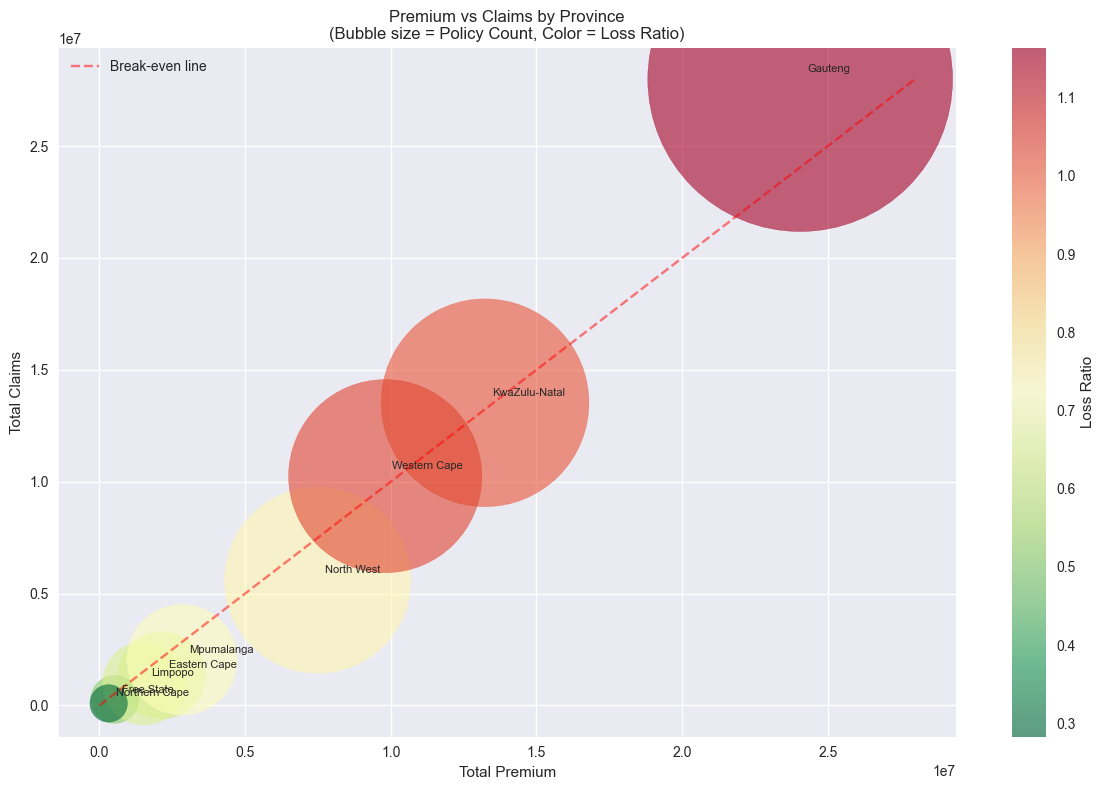

Provinces above the red line are unprofitable


In [49]:
### Premium vs Claims Bubble Chart

# Bubble chart showing relationship between premium, claims, and policy volume
if all(col in df.columns for col in ['Province', 'TotalPremium', 'TotalClaims']):
    
    bubble_data = df.groupby('Province').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(bubble_data['TotalPremium'], bubble_data['TotalClaims'], 
                         s=bubble_data['PolicyID']/5, alpha=0.6, 
                         c=bubble_data['TotalClaims']/bubble_data['TotalPremium'], 
                         cmap='RdYlGn_r')
    
    # Add province labels
    for i, province in enumerate(bubble_data['Province']):
        plt.annotate(province, (bubble_data.iloc[i]['TotalPremium'], 
                               bubble_data.iloc[i]['TotalClaims']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # Add diagonal line for break-even
    max_val = max(bubble_data['TotalPremium'].max(), bubble_data['TotalClaims'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Break-even line')
    
    plt.xlabel('Total Premium')
    plt.ylabel('Total Claims')
    plt.title('Premium vs Claims by Province\n(Bubble size = Policy Count, Color = Loss Ratio)')
    plt.colorbar(scatter, label='Loss Ratio')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("Provinces above the red line are unprofitable")

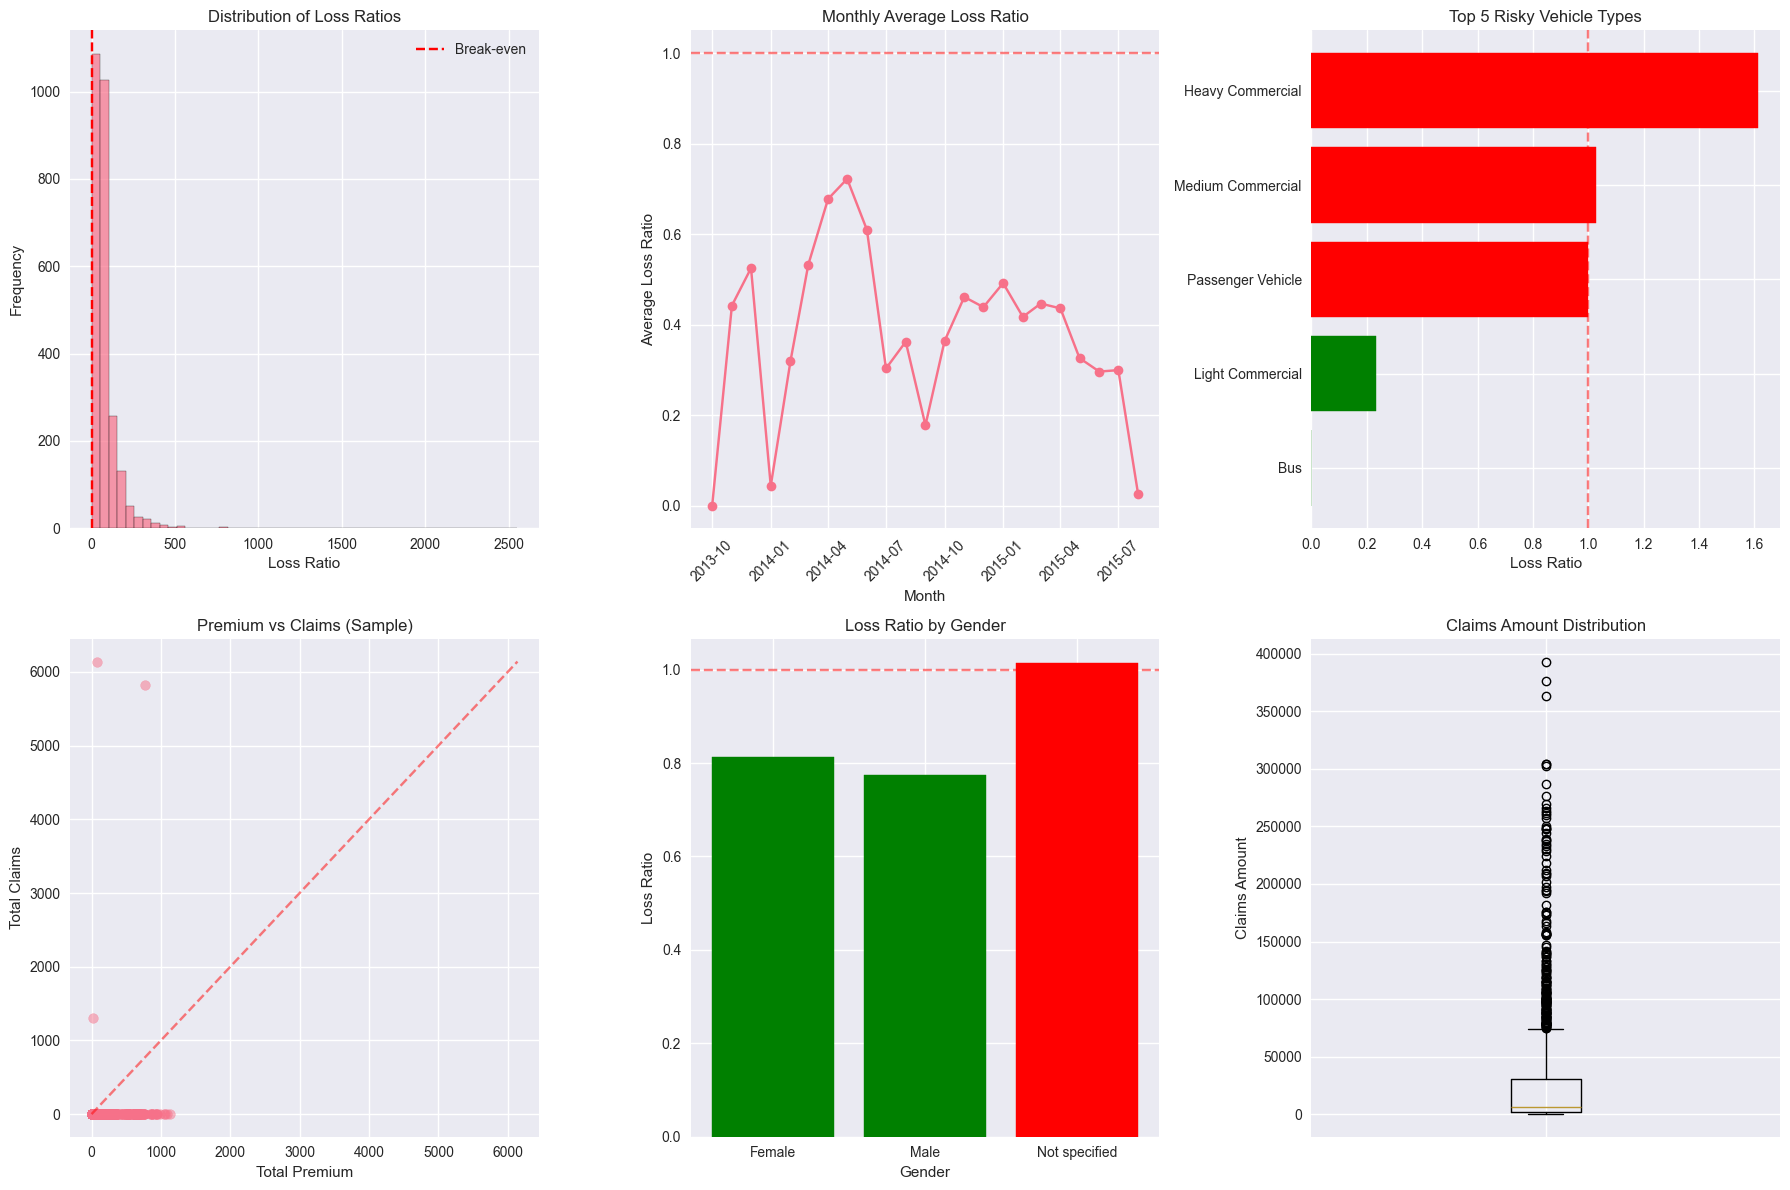

This dashboard provides a 360-degree view of portfolio performance


In [48]:
###  Profitability Dashboard
# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Loss Ratio Distribution
if 'LossRatio' in df.columns:
    loss_ratios = df[df['LossRatio'] > 0]['LossRatio']
    axes[0,0].hist(loss_ratios, bins=50, alpha=0.7, edgecolor='black')
    axes[0,0].axvline(x=1, color='red', linestyle='--', label='Break-even')
    axes[0,0].set_title('Distribution of Loss Ratios')
    axes[0,0].set_xlabel('Loss Ratio')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].legend()

# 2. Monthly Performance
if 'TransactionMonth' in df.columns:
    monthly_perf = df.groupby('TransactionMonth')['LossRatio'].mean()
    axes[0,1].plot(monthly_perf.index, monthly_perf.values, marker='o')
    axes[0,1].axhline(y=1, color='red', linestyle='--', alpha=0.5)
    axes[0,1].set_title('Monthly Average Loss Ratio')
    axes[0,1].set_xlabel('Month')
    axes[0,1].set_ylabel('Average Loss Ratio')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Top Risky Vehicle Types
if 'VehicleType' in df.columns:
    vehicle_risk = df.groupby('VehicleType').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum'
    })
    vehicle_risk['LossRatio'] = vehicle_risk['TotalClaims'] / vehicle_risk['TotalPremium']
    top_risk = vehicle_risk.sort_values('LossRatio', ascending=True).tail(5)
    
    bars = axes[0,2].barh(top_risk.index, top_risk['LossRatio'])
    axes[0,2].axvline(x=1, color='red', linestyle='--', alpha=0.5)
    axes[0,2].set_title('Top 5 Risky Vehicle Types')
    axes[0,2].set_xlabel('Loss Ratio')
    
    # Color coding
    for i, bar in enumerate(bars):
        if top_risk.iloc[i]['LossRatio'] > 1:
            bar.set_color('red')
        else:
            bar.set_color('green')

# 4. Premium vs Claims Scatter
if all(col in df.columns for col in ['TotalPremium', 'TotalClaims']):
    sample_data = df.sample(min(1000, len(df)))  # Sample for performance
    axes[1,0].scatter(sample_data['TotalPremium'], sample_data['TotalClaims'], alpha=0.5)
    max_val = max(sample_data['TotalPremium'].max(), sample_data['TotalClaims'].max())
    axes[1,0].plot([0, max_val], [0, max_val], 'r--', alpha=0.5)
    axes[1,0].set_title('Premium vs Claims (Sample)')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Claims')

# 5. Gender Analysis
if 'Gender' in df.columns:
    gender_analysis = df.groupby('Gender').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'count'
    })
    gender_analysis['LossRatio'] = gender_analysis['TotalClaims'] / gender_analysis['TotalPremium']
    
    bars = axes[1,1].bar(gender_analysis.index, gender_analysis['LossRatio'])
    axes[1,1].axhline(y=1, color='red', linestyle='--', alpha=0.5)
    axes[1,1].set_title('Loss Ratio by Gender')
    axes[1,1].set_xlabel('Gender')
    axes[1,1].set_ylabel('Loss Ratio')
    
    # Color coding
    for i, bar in enumerate(bars):
        if gender_analysis.iloc[i]['LossRatio'] > 1:
            bar.set_color('red')
        else:
            bar.set_color('green')

# 6. Claims Amount Distribution
if 'TotalClaims' in df.columns:
    claims_data = df[df['TotalClaims'] > 0]['TotalClaims']
    axes[1,2].boxplot(claims_data)
    axes[1,2].set_title('Claims Amount Distribution')
    axes[1,2].set_ylabel('Claims Amount')
    axes[1,2].tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()

print("This dashboard provides a 360-degree view of portfolio performance")

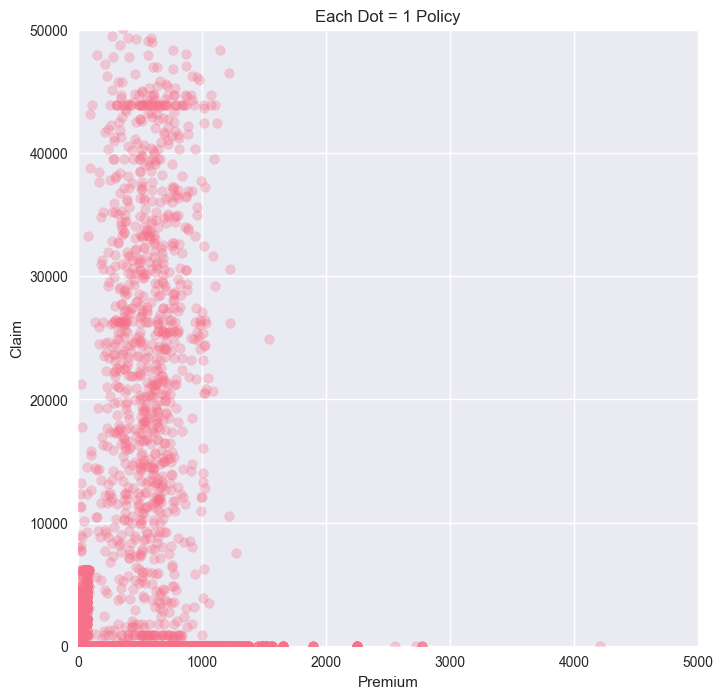

In [22]:
# 2. Claims vs Premium Scatterplot
plt.figure(figsize=(8,8))
plt.scatter(df['TotalPremium'], df['TotalClaims'], alpha=0.3)
plt.xlim(0, 5000)
plt.ylim(0, 50000)
plt.xlabel("Premium")
plt.ylabel("Claim")
plt.title("Each Dot = 1 Policy")
plt.show()